In [37]:
import matplotlib.pyplot as plot
import numpy as np
import csv
import scipy.stats


average_energy_null_to_cold_process = []
average_energy_null_to_warm_disk_process = []
average_energy_warm_disk_to_warm_cpu_process = []
average_energy_cold_to_warm_disk_process = []
average_energy_warm_cpu_to_warm_disk_process = []
average_energy_active_to_warm_disk_process = []
average_energy_warm_disk_to_cold_process = []
average_energy_cold_to_null_process = []

average_energy_null_to_cold_process_std = []
average_energy_null_to_warm_disk_process_std = []
average_energy_warm_disk_to_warm_cpu_process_std = []
average_energy_cold_to_warm_disk_process_std = []
average_energy_warm_cpu_to_warm_disk_process_std = []
average_energy_active_to_warm_disk_process_std = []
average_energy_warm_disk_to_cold_process_std = []
average_energy_cold_to_null_process_std = []

average_power_null_to_cold_process = []
average_power_null_to_warm_disk_process = []
average_power_warm_disk_to_warm_cpu_process = []
average_power_cold_to_warm_disk_process = []
average_power_warm_cpu_to_warm_disk_process = []
average_power_active_to_warm_disk_process = []
average_power_warm_disk_to_cold_process = []
average_power_cold_to_null_process = []

# Calculate z-value for 90% confidence interval
confidence_level = 0.90
z_value = scipy.stats.norm.ppf((1 + confidence_level) / 2)  # For 90% confidence interval


In [38]:
import random

base_power = 1.8

for i in range(1,11):
    file_name = "../../../Measurements/Lifecycle/wifi/resource/jetson/arm_pod_1_rep_"+str(i)+"_18_7_2023_8h55.csv"
    #PROCESS
    time_power_null_to_cold_process = []
    time_power_warm_disk_to_warm_cpu_process = []
    time_power_warm_cpu_to_warm_disk_process = []
    time_power_active_to_warm_disk_process = []
    time_power_warm_disk_to_cold_process = []
    time_power_cold_to_null_process = []

    with open(file_name, newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        for row in spamreader:
            if row[9] == "null_to_cold_process":
                time_power_null_to_cold_process.append([float(row[0]),float(row[3])])
            elif row[9] == "warm_disk_to_warm_cpu_process":
                time_power_warm_disk_to_warm_cpu_process.append([float(row[0]),float(row[3])])
            elif row[9] == "warm_cpu_to_warm_disk_process":
                time_power_warm_cpu_to_warm_disk_process.append([float(row[0]),float(row[3])])
            elif row[9] == "active_to_warm_disk_process":
                time_power_active_to_warm_disk_process.append([float(row[0]),float(row[3])])
            elif row[9] == "warm_disk_to_cold_process":
                time_power_warm_disk_to_cold_process.append([float(row[0]),float(row[3])])
            elif row[9] == "cold_to_null_process":
                time_power_cold_to_null_process.append([float(row[0]),float(row[3])])
                
        # caculate energy null_to_cold_proces
        previos_time = time_power_null_to_cold_process[0][0]
        previos_power = time_power_null_to_cold_process[0][1] - base_power
        energy_null_to_cold_process = 0
        for i in range(1, len(time_power_null_to_cold_process)):
            current_energy = (time_power_null_to_cold_process[i][0] - previos_time)*previos_power
            energy_null_to_cold_process += current_energy
            previos_time = time_power_null_to_cold_process[i][0]
            previos_power = time_power_null_to_cold_process[i][1] - base_power
        average_energy_null_to_cold_process.append(energy_null_to_cold_process)

        # caculate energy warm_disk_to_warm_cpu_process
        previos_time = time_power_warm_disk_to_warm_cpu_process[0][0] 
        previos_power = time_power_warm_disk_to_warm_cpu_process[0][1] - base_power
        energy_warm_disk_to_warm_cpu_process = 0
        for i in range(1, len(time_power_warm_disk_to_warm_cpu_process)):
            current_energy = (time_power_warm_disk_to_warm_cpu_process[i][0] - previos_time)*previos_power
            energy_warm_disk_to_warm_cpu_process += current_energy
            previos_time = time_power_warm_disk_to_warm_cpu_process[i][0]
            previos_power = time_power_warm_disk_to_warm_cpu_process[i][1] - base_power
        average_energy_warm_disk_to_warm_cpu_process.append(energy_warm_disk_to_warm_cpu_process)


        # caculate energy warm_cpu_to_warm_disk_process
        previos_time = time_power_warm_cpu_to_warm_disk_process[0][0] 
        previos_power = time_power_warm_cpu_to_warm_disk_process[0][1] - base_power
        energy_warm_cpu_to_warm_disk_process = 0
        for i in range(1, len(time_power_warm_cpu_to_warm_disk_process)):
            current_energy = (time_power_warm_cpu_to_warm_disk_process[i][0] - previos_time)*previos_power
            energy_warm_cpu_to_warm_disk_process += current_energy
            previos_time = time_power_warm_cpu_to_warm_disk_process[i][0]
            previos_power = time_power_warm_cpu_to_warm_disk_process[i][1] - base_power
        average_energy_warm_cpu_to_warm_disk_process.append(energy_warm_cpu_to_warm_disk_process)

        # caculate energy active_to_warm_disk_process
        previos_time = time_power_active_to_warm_disk_process[0][0] 
        previos_power = time_power_active_to_warm_disk_process[0][1] - base_power
        energy_active_to_warm_disk_process = 0
        for i in range(1, len(time_power_active_to_warm_disk_process)):
            current_energy = (time_power_active_to_warm_disk_process[i][0] - previos_time)*previos_power
            energy_active_to_warm_disk_process += current_energy
            previos_time = time_power_active_to_warm_disk_process[i][0]
            previos_power = time_power_active_to_warm_disk_process[i][1] - base_power
        average_energy_active_to_warm_disk_process.append(energy_active_to_warm_disk_process)


        # # NOTE: this is self-generated
        # previos_time = time_power_warm_cpu_to_warm_disk_process[0][0]
        # previos_power = time_power_warm_cpu_to_warm_disk_process[0][1] + random.randint(-30, 100)/1000.0
        # energy_active_to_warm_disk_process = 0
        # for i in range(1, len(time_power_warm_cpu_to_warm_disk_process)):
        #     current_energy = (time_power_warm_cpu_to_warm_disk_process[i][0] - previos_time)*previos_power
        #     energy_active_to_warm_disk_process += current_energy
        #     previos_time = time_power_warm_cpu_to_warm_disk_process[i][0]
        #     previos_power = time_power_warm_cpu_to_warm_disk_process[i][1] + random.randint(-500, 1500)/1000.0
        # average_energy_active_to_warm_disk_process.append(energy_active_to_warm_disk_process)

        # caculate energy cold_to_null_process
        previos_time = time_power_cold_to_null_process[0][0]
        previos_power = time_power_cold_to_null_process[0][1] - base_power
        energy_cold_to_null_process = 0
        for i in range(1, len(time_power_cold_to_null_process)):
            current_energy = (time_power_cold_to_null_process[i][0] - previos_time)*previos_power
            energy_cold_to_null_process += current_energy
            previos_time = time_power_cold_to_null_process[i][0]
            previos_power = time_power_cold_to_null_process[i][1] - base_power
        average_energy_cold_to_null_process.append(energy_cold_to_null_process)


for i in range(1,10):
    file_name = "../../../Measurements/Lifecycle/wifi/resource/jetson/warm/arm_pod_1_rep_"+str(i)+"_782023_16h39.csv"
    #PROCESS
    time_power_null_to_warm_disk_process = []

    with open(file_name, newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        for row in spamreader:
            if row[9] == "cold_to_warm_disk_process":
                time_power_null_to_warm_disk_process.append([float(row[0]),float(row[3])])
        # caculate energy null_to_cold_proces
        previos_time = time_power_null_to_warm_disk_process[0][0] 
        previos_power = time_power_null_to_warm_disk_process[0][1] - base_power
        energy_null_to_warm_disk_process = 0
        for i in range(1, len(time_power_null_to_warm_disk_process)):
            current_energy = (time_power_null_to_warm_disk_process[i][0] - previos_time)*previos_power
            energy_null_to_warm_disk_process += current_energy
            previos_time = time_power_null_to_warm_disk_process[i][0]
            previos_power = time_power_null_to_warm_disk_process[i][1] - base_power
        average_energy_null_to_warm_disk_process.append(energy_null_to_warm_disk_process)
        # print(average_energy_null_to_warm_disk_process)

In [39]:
# Calculate the average
energy_null_to_cold_process_mean = np.mean(average_energy_null_to_cold_process)
energy_warm_disk_to_warm_cpu_process_mean = np.mean(average_energy_warm_disk_to_warm_cpu_process)
energy_warm_cpu_to_warm_disk_process_mean = np.mean(average_energy_warm_cpu_to_warm_disk_process)
energy_active_to_warm_disk_process_mean = np.mean(average_energy_active_to_warm_disk_process)
energy_cold_to_warm_disk_process_mean = np.mean(average_energy_null_to_warm_disk_process) - energy_null_to_cold_process_mean - energy_warm_disk_to_warm_cpu_process_mean
energy_cold_to_null_process_mean = np.mean(average_energy_cold_to_null_process)
energy_warm_disk_to_cold_process_mean = energy_cold_to_null_process_mean

# Calculate the standard deviation

energy_null_to_cold_process_std = np.std(average_energy_null_to_cold_process)/np.sqrt(len(average_energy_null_to_cold_process))*z_value
energy_warm_disk_to_warm_cpu_process_std = np.std(average_energy_warm_disk_to_warm_cpu_process)/np.sqrt(len(average_energy_warm_disk_to_warm_cpu_process))*z_value
energy_warm_cpu_to_warm_disk_process_std= np.std(average_energy_warm_cpu_to_warm_disk_process)/np.sqrt(len(average_energy_warm_cpu_to_warm_disk_process))*z_value
energy_active_to_warm_disk_process_std = np.std(average_energy_active_to_warm_disk_process)/np.sqrt(len(average_energy_active_to_warm_disk_process))*z_value
energy_cold_to_warm_disk_process_std = np.std(average_energy_null_to_warm_disk_process) /np.sqrt(len(average_energy_null_to_warm_disk_process))*z_value
energy_cold_to_null_process_std = np.std(average_energy_cold_to_null_process)/np.sqrt(len(average_energy_cold_to_null_process))*z_value
energy_warm_disk_to_cold_process_std = energy_cold_to_null_process_std*z_value

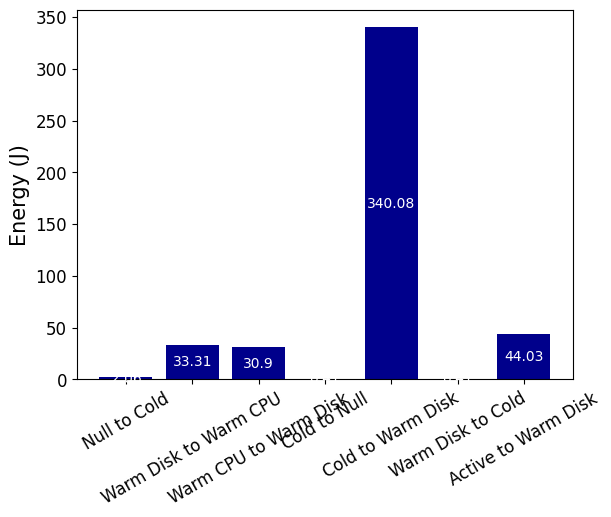

In [40]:

data = [energy_null_to_cold_process_mean, energy_warm_disk_to_warm_cpu_process_mean, 
        energy_warm_cpu_to_warm_disk_process_mean, energy_cold_to_null_process_mean, energy_cold_to_warm_disk_process_mean, energy_warm_disk_to_cold_process_mean, energy_active_to_warm_disk_process_mean]

# error = [energy_null_to_cold_process_std, energy_warm_disk_to_warm_cpu_process_std, 
#         energy_warm_cpu_to_warm_disk_process_std, energy_cold_to_null_process_std, energy_cold_to_warm_disk_process_std, energy_warm_disk_to_cold_process_std, energy_active_to_warm_disk_process_std]
# errorx = [x*z_value for x in error]

# error = [energy_null_to_cold_process_std, energy_warm_disk_to_warm_cpu_process_std, 
#         energy_warm_cpu_to_warm_disk_process_std, energy_active_to_warm_disk_process_std, 
#         energy_cold_to_null_process_std]
# state = ["$P_n^c$", "$P_c^{wd}$", "$P_{wd}^{wc}$", "$P_{wc}^{wd}$", "$P_{wm}^{wd}$", "$P_a^{wd}$", "$P_{wd}^c$", "$P_c^n$"]
# state = ["Null to Cold", "Cold to Warm Disk", "Warm Disk to Warm CPU", "Warm CPU to Warm Disk", "Warm Mem to Warm Disk", "Active to Warm Disk", "Warm Disk to Cold", "Cold to Null"]
state = ["Null to Cold", "Warm Disk to Warm CPU", "Warm CPU to Warm Disk", "Cold to Null", "Cold to Warm Disk", "Warm Disk to Cold", "Active to Warm Disk"]

fig1, ax1 = plot.subplots()
x_pos = x_pos = np.arange(len(state))
ax1.bar(x_pos, data, align='center',
        alpha=0.9,  capsize=10)
data_round = [round(x, 2) for x in data]
bars= ax1.bar(state, data_round, color="darkblue")
ax1.bar_label(bars, label_type='center',color="w", fontsize = 10)
# ax1.set_title('Energy in processes')
# ax1.set_xlabel("Processes ($P$)", fontsize = 15)
ax1.set_ylabel("Energy (J)", fontsize = 15)
# plot.xticks(rotation = 15)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(state, rotation=30)
# plot.yscale('log', base=10)
# ax1.set_ylim(0,140)
ax1.tick_params(axis='both', which='major', labelsize=12)
# plot.savefig('../pdf/Energy-processes.pdf', bbox_inches='tight')
plot.show()

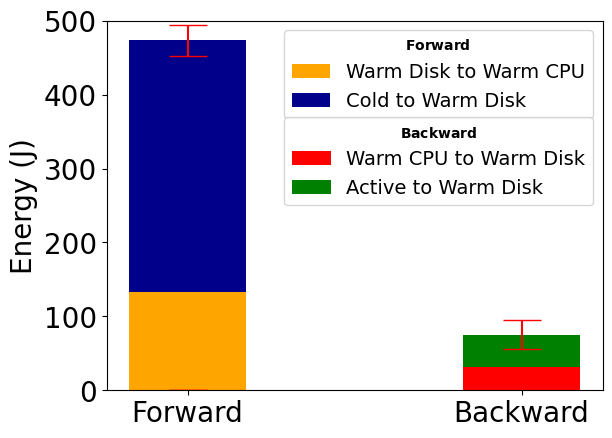

In [42]:
from matplotlib import rc
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
# Sample data
categories = ['Forward', 'Backward']

other_forwards =  energy_warm_disk_to_warm_cpu_process_mean + 100
other_backwards = energy_warm_disk_to_cold_process_mean + energy_cold_to_null_process_mean
column1 = [other_forwards, 0]
column2 = [energy_cold_to_warm_disk_process_mean, 0]
error_1 = energy_cold_to_warm_disk_process_std + energy_warm_disk_to_warm_cpu_process_std
column3 = [0, energy_warm_cpu_to_warm_disk_process_mean]
column4 = [0, energy_active_to_warm_disk_process_mean]
error_2 = energy_warm_disk_to_cold_process_std + energy_cold_to_null_process_std + energy_warm_cpu_to_warm_disk_process_std + energy_active_to_warm_disk_process_std
errorx = [error_1, error_2]
x = np.arange(len(categories))  # x values for categories

# Create a figure and axis
fig, ax = plot.subplots()

tick_fontsize = 20
label_fontsize = 20
lg_fontsize = 14
bar_width = 0.35
cap_size = 14
# Create stacked bars
# ax.bar(x_pos, data, yerr=errorx, align='center', alpha=0.9, ecolor='red', capsize=cap_size)

bar_1 = ax.bar(x, column1, width=bar_width, label='Warm Disk to Warm CPU', color='orange')
bar_2 = ax.bar(x, column2, width=bar_width, yerr=[error_1, 0], bottom=column1, color='darkblue', label='Cold to Warm Disk', ecolor='red', capsize=cap_size)
bar_3 = ax.bar(x, column3, width=bar_width, bottom=np.add(column1, column2), color='red', label='Warm CPU to Warm Disk')
bar_4 = ax.bar(x, column4, width=bar_width, yerr=[0, error_2], bottom=column3, color='green', label='Active to Warm Disk', ecolor='red', capsize=cap_size)
plot_bar = []

plot_bar.append([bar_1, bar_2, bar_3, bar_4])
# print(plot_bar[0])
ax.set_xticks(x)
ax.set_xticklabels(categories)
# ax.set_xlabel('Direction of Process', fontsize = label_fontsize)
ax.set_ylabel('Energy (J)', fontsize = label_fontsize)
plot.tick_params(axis='both', which='major', labelsize=tick_fontsize)

# Set the y-axis range
y_min = 0  # Minimum y-axis value
y_max = 500  # Maximum y-axis value
plot.ylim(y_min, y_max, 6)

# ax.legend()
include = [0,1]
legend1 = ax.legend([plot_bar[0][i] for i in include],[plot_bar[0][i].get_label() for i in include], loc=1, fontsize=lg_fontsize, title="$\\bf{Forward}$")
legend_location = (0.358, 0.5)
legend2 = ax.legend([plot_bar[0][i] for i in [2,3]],[plot_bar[0][i].get_label() for i in [2,3]], loc=legend_location, fontsize=lg_fontsize,title="$\\bf{Backward}$")
plot.gca().add_artist(legend1)
# plot.title('Stacked Bar Chart')
plot.savefig('./new/energy-edge.pdf', bbox_inches='tight')

plot.show()